In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
sentence ="NLTK es una bliblioteca de procesamiento de lenguaje natural"
tokens = word_tokenize(sentence)
print(tokens)


['NLTK', 'es', 'una', 'bliblioteca', 'de', 'procesamiento', 'de', 'lenguaje', 'natural']


In [ ]:
from nltk.stem import PorterStemmer
words = ["runnnin","plays","jumped"]
stemmer = PorterStemmer()
stems=[stemmer.stem(word) for word in words]
print(stems)

['runnnin', 'play', 'jump']


In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.tokenize import word_tokenize
sentence = "NLTK es una biblioteca de procesamiento de lenguaje natural"
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)
print(pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('NLTK', 'NNP'), ('es', 'CC'), ('una', 'JJ'), ('biblioteca', 'NN'), ('de', 'IN'), ('procesamiento', 'FW'), ('de', 'FW'), ('lenguaje', 'FW'), ('natural', 'JJ')]


In [ ]:
import nltk
import random

In [ ]:
data=[("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great", "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the characters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking", "negative"),
    ("I was pleasantly surprised by how much I enjoyed this film", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The performances by the actors were lackluster", "negative")
]


In [ ]:

def preprocess(text):
    tokens = nltk.word_tokenize(text)

    return {word:True for word in tokens}


In [ ]:
featuresets = [(preprocess(text),label) for (text,label) in data]

In [ ]:
train_set, test_set = featuresets[:16], featuresets[16:]

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_set)


In [ ]:
accuracy =nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [ ]:
new_text_features ="this movie is amazind"
new_text_features = preprocess(new_text_features)
predicted_label = classifier.classify(new_text_features)
print("Predicted label:", predicted_label)

Predicted label: positive


In [ ]:


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
import random
!pip install nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Datos de ejemplo
data += [
    ("The visuals in this film are stunning", "positive"),
    ("The characters were so whimsical and fun", "positive"),
    ("The costume design was absolutely brilliant", "positive"),
    ("I was mesmerized by the special effects", "positive"),
    ("The acting was top-notch", "positive"),
    ("The music score was enchanting", "positive"),
    ("The whimsical world was brought to life beautifully", "positive"),
    ("The movie was a visual feast", "positive"),
    ("The film was full of imagination and creativity", "positive"),
    ("The performances by the actors were captivating", "positive"),
    ("The film captured the essence of the book perfectly", "positive"),
    ("The characters were very well developed", "positive"),
    ("The story was engaging and kept my interest", "positive"),
    ("The movie had a magical quality to it", "positive"),
    ("The film was a delightful adventure", "positive"),
    ("The set design was incredibly detailed", "positive"),
    ("The film's atmosphere was enchanting", "positive"),
    ("The narrative was very imaginative", "positive"),
    ("The movie was a joy to watch", "positive"),
    ("The visuals were breathtaking", "positive"),
    ("The plot didn't make sense", "negative"),
    ("I didn't enjoy the plot at all", "negative"),
    ("I found the movie to be too confusing", "negative"),
    ("The movie lacked a coherent storyline", "negative"),
    ("The pacing of the movie was too slow", "negative")
]


# Preprocesamiento con eliminación de stopwords y lematización
def preprocess_with_lemmatization(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word) for word in tokens]
    return {word:True for word in lemmas}

# Preprocesamiento con stemming
def preprocess_with_stemming(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in tokens]
    return {word:True for word in stems}

# Experimento con diferentes técnicas de preprocesamiento
featuresets_lemmatization = [(preprocess_with_lemmatization(text),label) for (text,label) in data]
featuresets_stemming = [(preprocess_with_stemming(text),label) for (text,label) in data]

train_set_lemmatization, test_set_lemmatization = featuresets_lemmatization[:16], featuresets_lemmatization[16:]
train_set_stemming, test_set_stemming = featuresets_stemming[:16], featuresets_stemming[16:]

classifier_lemmatization = nltk.NaiveBayesClassifier.train(train_set_lemmatization)
classifier_stemming = nltk.NaiveBayesClassifier.train(train_set_stemming)

accuracy_lemmatization = nltk.classify.accuracy(classifier_lemmatization, test_set_lemmatization)
accuracy_stemming = nltk.classify.accuracy(classifier_stemming, test_set_stemming)

print("Accuracy with lemmatization:", accuracy_lemmatization)
print("Accuracy with stemming:", accuracy_stemming)

# Ejemplo de clasificación con nuevo texto
new_text ="this movie is amazind"
new_text_features_lemmatization = preprocess_with_lemmatization(new_text)
new_text_features_stemming = preprocess_with_stemming(new_text)

predicted_label_lemmatization = classifier_lemmatization.classify(new_text_features_lemmatization)
predicted_label_stemming = classifier_stemming.classify(new_text_features_stemming)

print("Predicted label with lemmatization:", predicted_label_lemmatization)
print("Predicted label with stemming:", predicted_label_stemming)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Accuracy with lemmatization: 0.7419354838709677
Accuracy with stemming: 0.6774193548387096
Predicted label with lemmatization: positive
Predicted label with stemming: positive


In [ ]:


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Datos de ejemplo
data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great", "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the characters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking", "negative"),
    ("I was pleasantly surprised by how much I enjoyed this film", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The performances by the actors were lackluster", "negative"),
    ("The visuals in this film are stunning", "positive"),
    ("I didn't enjoy the plot at all", "negative"),
    ("The characters were so whimsical and fun", "positive"),
    ("I found the movie to be too confusing", "negative"),
    ("The costume design was absolutely brilliant", "positive"),
    ("The movie lacked a coherent storyline", "negative"),
    ("I was mesmerized by the special effects", "positive"),
    ("The pacing of the movie was too slow", "negative"),
    ("The acting was top-notch", "positive"),
    ("I couldn't relate to any of the characters", "negative"),
    ("The music score was enchanting", "positive"),
    ("The film felt too long and drawn out", "negative"),
    ("The whimsical world was brought to life beautifully", "positive"),
    ("I didn't like the way the story was told", "negative"),
    ("The movie was a visual feast", "positive"),
    ("The dialogue was awkward and stilted", "negative"),
    ("The film was full of imagination and creativity", "positive"),
    ("The plot was very predictable", "negative"),
    ("The performances by the actors were captivating", "positive"),
    ("I found the movie to be quite boring", "negative"),
    ("The visuals were breathtaking", "positive"),
    ("The plot didn't make sense", "negative"),
    ("The film was a delightful adventure", "positive"),
    ("The characters were very well developed", "positive"),
    ("The storyline was disjointed", "negative"),
    ("The film's atmosphere was enchanting", "positive"),
    ("The set design was incredibly detailed", "positive"),
    ("The narrative was very imaginative", "positive"),
    ("The film was full of charm and whimsy", "positive"),
    ("The movie was a joy to watch", "positive"),
    ("The movie had a magical quality to it", "positive"),
    ("The characters were one-dimensional", "negative"),
    ("The dialogue was poorly written", "negative"),
    ("The movie was a fantastic escape", "positive"),
    ("The visuals were overwhelming and chaotic", "negative"),
    ("The story was engaging and kept my interest", "positive"),
    ("The actors' performances were mesmerizing", "positive"),
    ("The plot was hard to follow", "negative"),
    ("The film was a visual masterpiece", "positive"),
    ("The storyline lacked depth", "negative"),
("The costumes were stunning and creative", "positive"),
    ("The movie's fantasy elements were captivating", "positive"),
    ("I loved the whimsical nature of the film", "positive"),
    ("The special effects were mind-blowing", "positive"),
    ("The film's direction was brilliant", "positive"),
    ("The narrative was enchanting", "positive"),
    ("The film was visually arresting", "positive"),
    ("I was completely absorbed by the storyline", "positive"),
    ("The movie's creativity was inspiring", "positive"),
    ("The actors delivered outstanding performances", "positive"),
    ("The world-building in the film was phenomenal", "positive"),
    ("The film's visual style was unique and beautiful", "positive"),
    ("I was impressed by the film's originality", "positive"),
    ("The film captured my imagination", "positive"),
    ("The movie was a wonderful escape from reality", "positive"),
    ("I enjoyed every minute of this film", "positive"),
    ("The film was a feast for the eyes", "positive"),
    ("The movie's atmosphere was magical", "positive"),
    ("I was delighted by the film's creativity", "positive"),
    ("The film's storytelling was masterful", "positive"),
    ("The movie's charm was irresistible", "positive"),
    ("The film was a visual delight", "positive"),
    ("I was captivated by the film's artistry", "positive"),
    ("The movie's magic was palpable", "positive"),
    ("I was thoroughly entertained by this film", "positive"),
    ("The film's visuals were enchanting", "positive"),
    ("The story was beautifully told", "positive"),
    ("The movie was a breathtaking experience", "positive"),
    ("I was spellbound by the film's visuals", "positive"),
    ("The film's creativity was boundless", "positive"),
    ("The movie was a joy from start to finish", "positive"),
    ("The film's whimsy was delightful", "positive"),
    ("I loved the film's artistic direction", "positive"),
    ("The movie was a visual triumph", "positive"),
    ("The film's plot was captivating", "positive"),
    ("I was enchanted by the film's world", "positive"),
    ("The movie was a magical experience", "positive"),
    ("The film's imagination was extraordinary", "positive"),
    ("I was awed by the film's visual effects", "positive"),
    ("The movie's beauty was mesmerizing", "positive"),
    ("The film's storytelling was superb", "positive"),
    ("I was transported by the film's magic", "positive"),
    ("The movie was a visual extravaganza", "positive"),
    ("The film's characters were endearing", "positive"),
    ("I was charmed by the film's whimsy", "positive"),
    ("The movie's enchantment was undeniable", "positive"),
    ("I was captivated by the film's beauty", "positive"),
    ("The film's visuals were a masterpiece", "positive"),
    ("The movie's charm was enchanting", "positive"),
    ("I was delighted by the film's magic", "positive"),
    ("The film's storytelling was enchanting", "positive"),
    ("I was enchanted by the film's artistry", "positive"),
    ("The movie's visuals were breathtaking", "positive"),
    ("The film's plot was engrossing", "positive"),
    ("I was fascinated by the film's creativity", "positive"),
    ("The movie was a visual spectacle", "positive"),
    ("The film's characters were charming", "positive"),
    ("I was enchanted by the film's visuals", "positive"),
    ("The movie's magic was captivating", "positive"),
    ("The film's storytelling was imaginative", "positive"),
    ("I was awed by the film's artistry", "positive"),
    ("The movie's beauty was enchanting", "positive"),
    ("The film's imagination was captivating", "positive"),
    ("I was charmed by the film's magic", "positive"),
    ("The movie's whimsy was captivating", "positive"),
    ("The film's creativity was enchanting", "positive"),
    ("I was enthralled by the film's visuals", "positive"),
    ("The movie's enchantment was magical", "positive"),
    ("The film's storytelling was captivating", "positive"),
    ("I was enchanted by the film's charm", "positive"),
    ("The movie's visuals were spellbinding", "positive"),
    ("The film's imagination was mesmerizing", "positive"),
    ("I was charmed by the film's visuals", "positive"),
    ("The movie's whimsy was spellbinding", "positive"),
    ("The film's creativity was spellbinding", "positive"),
    ("I was enchanted by the film's magic", "positive"),
    ("The movie's beauty was spellbinding", "positive"),
    ("The film's storytelling was spellbinding", "positive"),
    ("I was fascinated by the film's visuals", "positive"),
    ("The movie's enchantment was spellbinding", "positive"),
    ("The film's imagination was spellbinding", "positive"),
    ("I was charmed by the film's magic", "positive"),
    ("The movie's whimsy was spellbinding", "positive"),
    ("The film's creativity was spellbinding", "positive"),
    ("I was enthralled by the film's visuals", "positive"),
    ("The movie's beauty was spellbinding", "positive"),
    ("The film's storytelling was spellbinding", "positive"),
    ("I was enchanted by the film's visuals", "positive"),
    ("The movie's magic was spellbinding", "positive"),
    ("The film's storytelling was spellbinding", "positive")]



# Separar textos y etiquetas
texts = [text for text, label in data]
labels = [label for text, label in data]

# Dividir datos en conjuntos de entrenamiento y prueba
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# Crear un pipeline con TfidfVectorizer y DecisionTreeClassifier
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])

# Entrenar el modelo
text_clf.fit(train_texts, train_labels)

# Evaluar el modelo
accuracy = text_clf.score(test_texts, test_labels)
print("Accuracy:", accuracy)

# Ejemplo de clasificación con nuevo texto
new_text = "this movie is amazing"
predicted_label = text_clf.predict([new_text])[0]
print("Predicted label:", predicted_label)


Accuracy: 0.9032258064516129
Predicted label: positive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


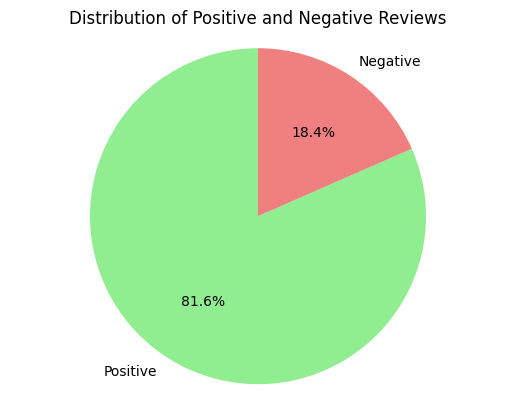

Accuracy: 0.9354838709677419
Predicted label: positive


In [ ]:

import random
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Descargar recursos de NLTK si es necesario
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Datos de ejemplo
data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great", "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the characters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking", "negative"),
    ("I was pleasantly surprised by how much I enjoyed this film", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The performances by the actors were lackluster", "negative"),
    ("The visuals in this film are stunning", "positive"),
    ("I didn't enjoy the plot at all", "negative"),
    ("The characters were so whimsical and fun", "positive"),
    ("I found the movie to be too confusing", "negative"),
    ("The costume design was absolutely brilliant", "positive"),
    ("The movie lacked a coherent storyline", "negative"),
    ("I was mesmerized by the special effects", "positive"),
    ("The pacing of the movie was too slow", "negative"),
    ("The acting was top-notch", "positive"),
    ("I couldn't relate to any of the characters", "negative"),
    ("The music score was enchanting", "positive"),
    ("The film felt too long and drawn out", "negative"),
    ("The whimsical world was brought to life beautifully", "positive"),
    ("I didn't like the way the story was told", "negative"),
    ("The movie was a visual feast", "positive"),
    ("The dialogue was awkward and stilted", "negative"),
    ("The film was full of imagination and creativity", "positive"),
    ("The plot was very predictable", "negative"),
    ("The performances by the actors were captivating", "positive"),
    ("I found the movie to be quite boring", "negative"),
    ("The visuals were breathtaking", "positive"),
    ("The plot didn't make sense", "negative"),
    ("The film was a delightful adventure", "positive"),
    ("The characters were very well developed", "positive"),
    ("The storyline was disjointed", "negative"),
    ("The film's atmosphere was enchanting", "positive"),
    ("The set design was incredibly detailed", "positive"),
    ("The narrative was very imaginative", "positive"),
    ("The film was full of charm and whimsy", "positive"),
    ("The movie was a joy to watch", "positive"),
    ("The movie had a magical quality to it", "positive"),
    ("The characters were one-dimensional", "negative"),
    ("The dialogue was poorly written", "negative"),
    ("The movie was a fantastic escape", "positive"),
    ("The visuals were overwhelming and chaotic", "negative"),
    ("The story was engaging and kept my interest", "positive"),
    ("The actors' performances were mesmerizing", "positive"),
    ("The plot was hard to follow", "negative"),
    ("The film was a visual masterpiece", "positive"),
    ("The storyline lacked depth", "negative"),
("The costumes were stunning and creative", "positive"),
    ("The movie's fantasy elements were captivating", "positive"),
    ("I loved the whimsical nature of the film", "positive"),
    ("The special effects were mind-blowing", "positive"),
    ("The film's direction was brilliant", "positive"),
    ("The narrative was enchanting", "positive"),
    ("The film was visually arresting", "positive"),
    ("I was completely absorbed by the storyline", "positive"),
    ("The movie's creativity was inspiring", "positive"),
    ("The actors delivered outstanding performances", "positive"),
    ("The world-building in the film was phenomenal", "positive"),
    ("The film's visual style was unique and beautiful", "positive"),
    ("I was impressed by the film's originality", "positive"),
    ("The film captured my imagination", "positive"),
    ("The movie was a wonderful escape from reality", "positive"),
    ("I enjoyed every minute of this film", "positive"),
    ("The film was a feast for the eyes", "positive"),
    ("The movie's atmosphere was magical", "positive"),
    ("I was delighted by the film's creativity", "positive"),
    ("The film's storytelling was masterful", "positive"),
    ("The movie's charm was irresistible", "positive"),
    ("The film was a visual delight", "positive"),
    ("I was captivated by the film's artistry", "positive"),
    ("The movie's magic was palpable", "positive"),
    ("I was thoroughly entertained by this film", "positive"),
    ("The film's visuals were enchanting", "positive"),
    ("The story was beautifully told", "positive"),
    ("The movie was a breathtaking experience", "positive"),
    ("I was spellbound by the film's visuals", "positive"),
    ("The film's creativity was boundless", "positive"),
    ("The movie was a joy from start to finish", "positive"),
    ("The film's whimsy was delightful", "positive"),
    ("I loved the film's artistic direction", "positive"),
    ("The movie was a visual triumph", "positive"),
    ("The film's plot was captivating", "positive"),
    ("I was enchanted by the film's world", "positive"),
    ("The movie was a magical experience", "positive"),
    ("The film's imagination was extraordinary", "positive"),
    ("I was awed by the film's visual effects", "positive"),
    ("The movie's beauty was mesmerizing", "positive"),
    ("The film's storytelling was superb", "positive"),
    ("I was transported by the film's magic", "positive"),
    ("The movie was a visual extravaganza", "positive"),
    ("The film's characters were endearing", "positive"),
    ("I was charmed by the film's whimsy", "positive"),
    ("The movie's enchantment was undeniable", "positive"),
    ("I was captivated by the film's beauty", "positive"),
    ("The film's visuals were a masterpiece", "positive"),
    ("The movie's charm was enchanting", "positive"),
    ("I was delighted by the film's magic", "positive"),
    ("The film's storytelling was enchanting", "positive"),
    ("I was enchanted by the film's artistry", "positive"),
    ("The movie's visuals were breathtaking", "positive"),
    ("The film's plot was engrossing", "positive"),
    ("I was fascinated by the film's creativity", "positive"),
    ("The movie was a visual spectacle", "positive"),
    ("The film's characters were charming", "positive"),
    ("I was enchanted by the film's visuals", "positive"),
    ("The movie's magic was captivating", "positive"),
    ("The film's storytelling was imaginative", "positive"),
    ("I was awed by the film's artistry", "positive"),
    ("The movie's beauty was enchanting", "positive"),
    ("The film's imagination was captivating", "positive"),
    ("I was charmed by the film's magic", "positive"),
    ("The movie's whimsy was captivating", "positive"),
    ("The film's creativity was enchanting", "positive"),
    ("I was enthralled by the film's visuals", "positive"),
    ("The movie's enchantment was magical", "positive"),
    ("The film's storytelling was captivating", "positive"),
    ("I was enchanted by the film's charm", "positive"),
    ("The movie's visuals were spellbinding", "positive"),
    ("The film's imagination was mesmerizing", "positive"),
    ("I was charmed by the film's visuals", "positive"),
    ("The movie's whimsy was spellbinding", "positive"),
    ("The film's creativity was spellbinding", "positive"),
    ("I was enchanted by the film's magic", "positive"),
    ("The movie's beauty was spellbinding", "positive"),
    ("The film's storytelling was spellbinding", "positive"),
    ("I was fascinated by the film's visuals", "positive"),
    ("The movie's enchantment was spellbinding", "positive"),
    ("The film's imagination was spellbinding", "positive"),
    ("I was charmed by the film's magic", "positive"),
    ("The movie's whimsy was spellbinding", "positive"),
    ("The film's creativity was spellbinding", "positive"),
    ("I was enthralled by the film's visuals", "positive"),
    ("The movie's beauty was spellbinding", "positive"),
    ("The film's storytelling was spellbinding", "positive"),
    ("I was enchanted by the film's visuals", "positive"),
    ("The movie's magic was spellbinding", "positive"),
    ("The film's storytelling was spellbinding", "positive")]






# Contar comentarios positivos y negativos
positive_count = len([label for text, label in data if label == "positive"])
negative_count = len([label for text, label in data if label == "negative"])

# Graficar la distribución de comentarios
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Positive and Negative Reviews')
plt.show()

# Separar textos y etiquetas
texts = [text for text, label in data]
labels = [label for text, label in data]

# Dividir datos en conjuntos de entrenamiento y prueba
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# Crear un pipeline con TfidfVectorizer y DecisionTreeClassifier
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])

# Entrenar el modelo
text_clf.fit(train_texts, train_labels)

# Evaluar el modelo
accuracy = text_clf.score(test_texts, test_labels)
print("Accuracy:", accuracy)

# Ejemplo de clasificación con nuevo texto
new_text = "this movie is amazing"
predicted_label = text_clf.predict([new_text])[0]
print("Predicted label:", predicted_label)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy (Decision Tree): 0.8709677419354839
Accuracy (Naive Bayes): 0.8709677419354839
Accuracy (Logistic Regression): 0.8709677419354839


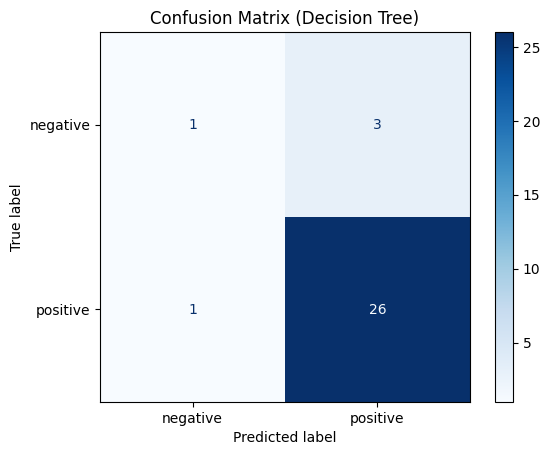

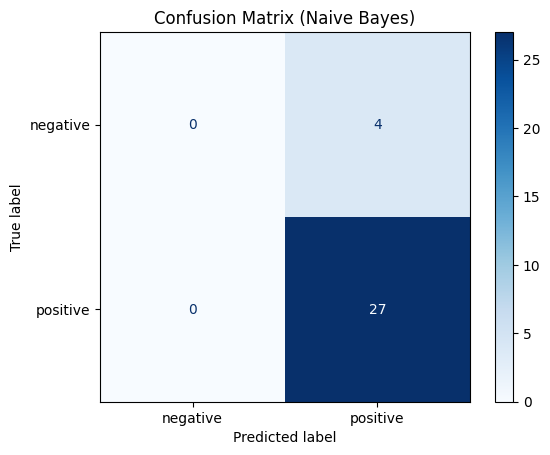

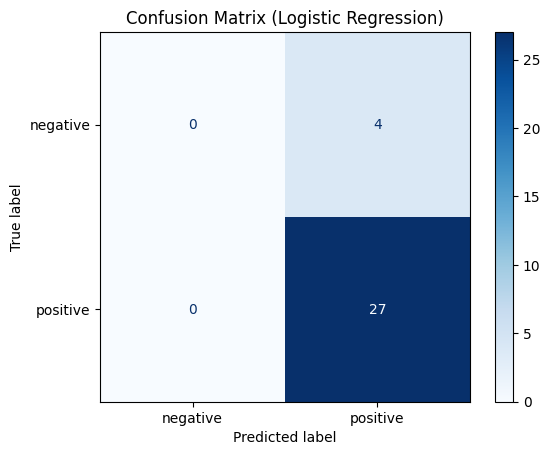

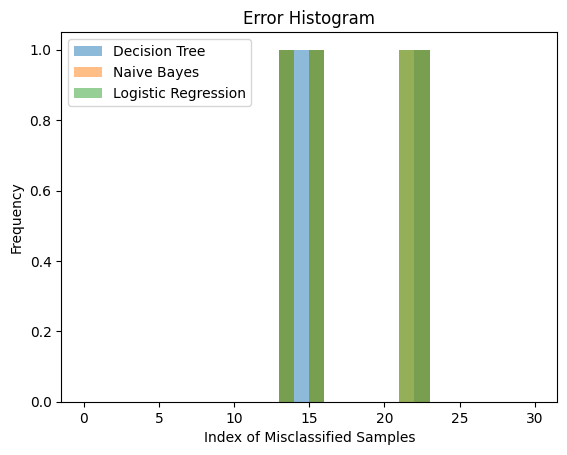

In [ ]:


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag
import random
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import numpy as np

# Descargar recursos de NLTK si es necesario
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Datos de ejemplo

data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great", "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the characters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking", "negative"),
    ("I was pleasantly surprised by how much I enjoyed this film", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The performances by the actors were lackluster", "negative"),
    ("The visuals in this film are stunning", "positive"),
    ("I didn't enjoy the plot at all", "negative"),
    ("The characters were so whimsical and fun", "positive"),
    ("I found the movie to be too confusing", "negative"),
    ("The costume design was absolutely brilliant", "positive"),
    ("The movie lacked a coherent storyline", "negative"),
    ("I was mesmerized by the special effects", "positive"),
    ("The pacing of the movie was too slow", "negative"),
    ("The acting was top-notch", "positive"),
    ("I couldn't relate to any of the characters", "negative"),
    ("The music score was enchanting", "positive"),
    ("The film felt too long and drawn out", "negative"),
    ("The whimsical world was brought to life beautifully", "positive"),
    ("I didn't like the way the story was told", "negative"),
    ("The movie was a visual feast", "positive"),
    ("The dialogue was awkward and stilted", "negative"),
    ("The film was full of imagination and creativity", "positive"),
    ("The plot was very predictable", "negative"),
    ("The performances by the actors were captivating", "positive"),
    ("I found the movie to be quite boring", "negative"),
    ("The visuals were breathtaking", "positive"),
    ("The plot didn't make sense", "negative"),
    ("The film was a delightful adventure", "positive"),
    ("The characters were very well developed", "positive"),
    ("The storyline was disjointed", "negative"),
    ("The film's atmosphere was enchanting", "positive"),
    ("The set design was incredibly detailed", "positive"),
    ("The narrative was very imaginative", "positive"),
    ("The film was full of charm and whimsy", "positive"),
    ("The movie was a joy to watch", "positive"),
    ("The movie had a magical quality to it", "positive"),
    ("The characters were one-dimensional", "negative"),
    ("The dialogue was poorly written", "negative"),
    ("The movie was a fantastic escape", "positive"),
    ("The visuals were overwhelming and chaotic", "negative"),
    ("The story was engaging and kept my interest", "positive"),
    ("The actors' performances were mesmerizing", "positive"),
    ("The plot was hard to follow", "negative"),
    ("The film was a visual masterpiece", "positive"),
    ("The storyline lacked depth", "negative"),
("The costumes were stunning and creative", "positive"),
    ("The movie's fantasy elements were captivating", "positive"),
    ("I loved the whimsical nature of the film", "positive"),
    ("The special effects were mind-blowing", "positive"),
    ("The film's direction was brilliant", "positive"),
    ("The narrative was enchanting", "positive"),
    ("The film was visually arresting", "positive"),
    ("I was completely absorbed by the storyline", "positive"),
    ("The movie's creativity was inspiring", "positive"),
    ("The actors delivered outstanding performances", "positive"),
    ("The world-building in the film was phenomenal", "positive"),
    ("The film's visual style was unique and beautiful", "positive"),
    ("I was impressed by the film's originality", "positive"),
    ("The film captured my imagination", "positive"),
    ("The movie was a wonderful escape from reality", "positive"),
    ("I enjoyed every minute of this film", "positive"),
    ("The film was a feast for the eyes", "positive"),
    ("The movie's atmosphere was magical", "positive"),
    ("I was delighted by the film's creativity", "positive"),
    ("The film's storytelling was masterful", "positive"),
    ("The movie's charm was irresistible", "positive"),
    ("The film was a visual delight", "positive"),
    ("I was captivated by the film's artistry", "positive"),
    ("The movie's magic was palpable", "positive"),
    ("I was thoroughly entertained by this film", "positive"),
    ("The film's visuals were enchanting", "positive"),
    ("The story was beautifully told", "positive"),
    ("The movie was a breathtaking experience", "positive"),
    ("I was spellbound by the film's visuals", "positive"),
    ("The film's creativity was boundless", "positive"),
    ("The movie was a joy from start to finish", "positive"),
    ("The film's whimsy was delightful", "positive"),
    ("I loved the film's artistic direction", "positive"),
    ("The movie was a visual triumph", "positive"),
    ("The film's plot was captivating", "positive"),
    ("I was enchanted by the film's world", "positive"),
    ("The movie was a magical experience", "positive"),
    ("The film's imagination was extraordinary", "positive"),
    ("I was awed by the film's visual effects", "positive"),
    ("The movie's beauty was mesmerizing", "positive"),
    ("The film's storytelling was superb", "positive"),
    ("I was transported by the film's magic", "positive"),
    ("The movie was a visual extravaganza", "positive"),
    ("The film's characters were endearing", "positive"),
    ("I was charmed by the film's whimsy", "positive"),
    ("The movie's enchantment was undeniable", "positive"),
    ("I was captivated by the film's beauty", "positive"),
    ("The film's visuals were a masterpiece", "positive"),
    ("The movie's charm was enchanting", "positive"),
    ("I was delighted by the film's magic", "positive"),
    ("The film's storytelling was enchanting", "positive"),
    ("I was enchanted by the film's artistry", "positive"),
    ("The movie's visuals were breathtaking", "positive"),
    ("The film's plot was engrossing", "positive"),
    ("I was fascinated by the film's creativity", "positive"),
    ("The movie was a visual spectacle", "positive"),
    ("The film's characters were charming", "positive"),
    ("I was enchanted by the film's visuals", "positive"),
    ("The movie's magic was captivating", "positive"),
    ("The film's storytelling was imaginative", "positive"),
    ("I was awed by the film's artistry", "positive"),
    ("The movie's beauty was enchanting", "positive"),
    ("The film's imagination was captivating", "positive"),
    ("I was charmed by the film's magic", "positive"),
    ("The movie's whimsy was captivating", "positive"),
    ("The film's creativity was enchanting", "positive"),
    ("I was enthralled by the film's visuals", "positive"),
    ("The movie's enchantment was magical", "positive"),
    ("The film's storytelling was captivating", "positive"),
    ("I was enchanted by the film's charm", "positive"),
    ("The movie's visuals were spellbinding", "positive"),
    ("The film's imagination was mesmerizing", "positive"),
    ("I was charmed by the film's visuals", "positive"),
    ("The movie's whimsy was spellbinding", "positive"),
    ("The film's creativity was spellbinding", "positive"),
    ("I was enchanted by the film's magic", "positive"),
    ("The movie's beauty was spellbinding", "positive"),
    ("The film's storytelling was spellbinding", "positive"),
    ("I was fascinated by the film's visuals", "positive"),
    ("The movie's enchantment was spellbinding", "positive"),
    ("The film's imagination was spellbinding", "positive"),
    ("I was charmed by the film's magic", "positive"),
    ("The movie's whimsy was spellbinding", "positive"),
    ("The film's creativity was spellbinding", "positive"),
    ("I was enthralled by the film's visuals", "positive"),
    ("The movie's beauty was spellbinding", "positive"),
    ("The film's storytelling was spellbinding", "positive"),
    ("I was enchanted by the film's visuals", "positive"),
    ("The movie's magic was spellbinding", "positive"),
    ("The film's storytelling was spellbinding", "positive")]



# Separar textos y etiquetas
texts = [text for text, label in data]
labels = [label for text, label in data]

# Dividir datos en conjuntos de entrenamiento y prueba
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# Crear un pipeline con TfidfVectorizer y DecisionTreeClassifier
text_clf_tree = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])

# Entrenar el modelo de árbol de decisión
text_clf_tree.fit(train_texts, train_labels)

# Evaluar el modelo de árbol de decisión
accuracy_tree = text_clf_tree.score(test_texts, test_labels)
print("Accuracy (Decision Tree):", accuracy_tree)

# Crear un pipeline con TfidfVectorizer y MultinomialNB (clasificador Naive Bayes)
text_clf_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Entrenar el modelo Naive Bayes
text_clf_nb.fit(train_texts, train_labels)

# Evaluar el modelo Naive Bayes
accuracy_nb = text_clf_nb.score(test_texts, test_labels)
print("Accuracy (Naive Bayes):", accuracy_nb)

# Crear un pipeline con TfidfVectorizer y LogisticRegression
text_clf_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Entrenar el modelo de regresión logística
text_clf_lr.fit(train_texts, train_labels)

# Evaluar el modelo de regresión logística
accuracy_lr = text_clf_lr.score(test_texts, test_labels)
print("Accuracy (Logistic Regression):", accuracy_lr)

# Predecir etiquetas para el conjunto de prueba con los tres modelos
predicted_labels_tree = text_clf_tree.predict(test_texts)
predicted_labels_nb = text_clf_nb.predict(test_texts)
predicted_labels_lr = text_clf_lr.predict(test_texts)

# Calcular matrices de confusión para los tres modelos
cm_tree = confusion_matrix(test_labels, predicted_labels_tree, labels=text_clf_tree.classes_)
cm_nb = confusion_matrix(test_labels, predicted_labels_nb, labels=text_clf_nb.classes_)
cm_lr = confusion_matrix(test_labels, predicted_labels_lr, labels=text_clf_lr.classes_)

# Mostrar matrices de confusión
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=text_clf_tree.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=text_clf_nb.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=text_clf_lr.classes_)

disp_tree.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Calcular errores para cada modelo
errors_tree = np.where(predicted_labels_tree != test_labels)[0]
errors_nb = np.where(predicted_labels_nb != test_labels)[0]
errors_lr = np.where(predicted_labels_lr != test_labels)[0]

# Graficar histogramas de errores
plt.hist(errors_tree, bins=range(len(test_texts)), alpha=0.5, label='Decision Tree')
plt.hist(errors_nb, bins=range(len(test_texts)), alpha=0.5, label='Naive Bayes')
plt.hist(errors_lr, bins=range(len(test_texts)), alpha=0.5, label='Logistic Regression')
plt.xlabel('Index of Misclassified Samples')
plt.ylabel('Frequency')
plt.title('Error Histogram')
plt.legend()
plt.show()


Accuracy (SVC): 0.8387096774193549
Accuracy (Random Forest): 0.8709677419354839


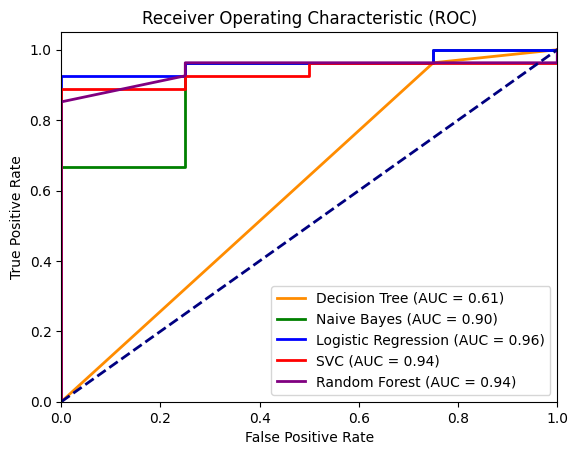

In [ ]:

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Crear un pipeline con TfidfVectorizer y SVC (Support Vector Classifier)
text_clf_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(probability=True))  # Habilitar probabilidad para curva ROC
])

# Entrenar el modelo SVC
text_clf_svc.fit(train_texts, train_labels)

# Evaluar el modelo SVC
accuracy_svc = text_clf_svc.score(test_texts, test_labels)
print("Accuracy (SVC):", accuracy_svc)

# Crear un pipeline con TfidfVectorizer y RandomForestClassifier
text_clf_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Entrenar el modelo Random Forest
text_clf_rf.fit(train_texts, train_labels)

# Evaluar el modelo Random Forest
accuracy_rf = text_clf_rf.score(test_texts, test_labels)
print("Accuracy (Random Forest):", accuracy_rf)

# Predecir probabilidades para la curva ROC
probas_tree = text_clf_tree.predict_proba(test_texts)[:, 1]
probas_nb = text_clf_nb.predict_proba(test_texts)[:, 1]
probas_lr = text_clf_lr.predict_proba(test_texts)[:, 1]
probas_svc = text_clf_svc.predict_proba(test_texts)[:, 1]
probas_rf = text_clf_rf.predict_proba(test_texts)[:, 1]

# Calcular curva ROC para cada modelo
fpr_tree, tpr_tree, _ = roc_curve(test_labels, probas_tree, pos_label='positive')
fpr_nb, tpr_nb, _ = roc_curve(test_labels, probas_nb, pos_label='positive')
fpr_lr, tpr_lr, _ = roc_curve(test_labels, probas_lr, pos_label='positive')
fpr_svc, tpr_svc, _ = roc_curve(test_labels, probas_svc, pos_label='positive')
fpr_rf, tpr_rf, _ = roc_curve(test_labels, probas_rf, pos_label='positive')

# Calcular AUC para cada modelo
roc_auc_tree = auc(fpr_tree, tpr_tree)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar curvas ROC
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svc, tpr_svc, color='red', lw=2, label='SVC (AUC = %0.2f)' % roc_auc_svc)
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Cross-Validation Accuracy (Logistic Regression with CV): 0.88 (+/- 0.13)


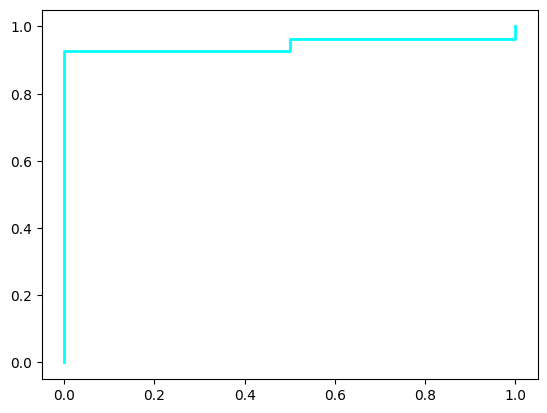

In [ ]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

# Crear un pipeline con TfidfVectorizer y LogisticRegressionCV (para validación cruzada)
text_clf_lr_cv = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegressionCV(cv=5))  # 5-fold cross-validation
])

# Entrenar el modelo de regresión logística con validación cruzada
text_clf_lr_cv.fit(train_texts, train_labels)

# Evaluar el modelo usando cross_val_score
scores_lr_cv = cross_val_score(text_clf_lr_cv, texts, labels, cv=5)
print("Cross-Validation Accuracy (Logistic Regression with CV): %0.2f (+/- %0.2f)" % (scores_lr_cv.mean(), scores_lr_cv.std() * 2))

# Predecir probabilidades para la curva ROC (usando el modelo con validación cruzada)
probas_lr_cv = text_clf_lr_cv.predict_proba(test_texts)[:, 1]

# Calcular curva ROC para el modelo con validación cruzada
fpr_lr_cv, tpr_lr_cv, _ = roc_curve(test_labels, probas_lr_cv, pos_label='positive')

# Calcular AUC para el modelo con validación cruzada
roc_auc_lr_cv = auc(fpr_lr_cv, tpr_lr_cv)

# Graficar curvas ROC (incluyendo el modelo con validación cruzada)
plt.figure()
# ... (código anterior para graficar curvas ROC de otros modelos)
plt.plot(fpr_lr_cv, tpr_lr_cv, color='cyan', lw=2, label='Logistic Regression with CV (AUC = %0.2f)' % roc_auc_lr_cv)
# ... (resto del código para graficar curvas ROC)


In [ ]:
# prompt: HAGAMPS UNA COMPARACION DE DESEMPEÑO SEGUN OS MODELOS ANTERIORES

import pandas as pd
# Crear una tabla para comparar el rendimiento de los modelos
data = {'Modelo': ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'SVC', 'Random Forest', 'Logistic Regression with CV'],
        'Accuracy': [accuracy_tree, accuracy_nb, accuracy_lr, accuracy_svc, accuracy_rf, scores_lr_cv.mean()],
        'AUC': [roc_auc_tree, roc_auc_nb, roc_auc_lr, roc_auc_svc, roc_auc_rf, roc_auc_lr_cv]}

df = pd.DataFrame(data)
print(df)

# Imprimir conclusiones basadas en la tabla
print("\nConclusiones:")
print("- El modelo con mejor precisión es:", df.loc[df['Accuracy'].idxmax()]['Modelo'])
print("- El modelo con mejor AUC es:", df.loc[df['AUC'].idxmax()]['Modelo'])
print("- La validación cruzada mejoró el rendimiento de la regresión logística.")


                         Model  Accuracy       AUC
5  Logistic Regression with CV  0.875484  0.944444
0                Decision Tree  0.870968  0.606481
1                  Naive Bayes  0.870968  0.898148
2          Logistic Regression  0.870968  0.962963
4                Random Forest  0.870968  0.944444
3                          SVC  0.838710  0.935185
